
## Projeto | Construido uma rede com jogos da Steam 🎮️

    
---------------------

**Equipe**


 * Letícia Coêlho Barbosa       | [Github](https://github.com/leticiacb1)
 <br>

 * Lídia Alves Chagas Domingos  | [Github](https://github.com/LidiaDomingos)
 <br>

 * Lorran Caetano Lopes         | [Github](https://github.com/lorrancmlopes)
 <br>
 
 ---------------------

* **Dataset escolhido** : [Jogos da Steam](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset)
  
  
  [Clique aqui](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset) para baixar

<br>

* **Dataset auxiliar** : [Total Revenue Empresas]()
  
  
  [Clique aqui](https://vginsights.com/publishers-database) para baixar

<br>

* **Dataset auxiliar | Modificado** : [Total Revenue Empresas Modificado](https://drive.google.com/file/d/1DUGhWPNJdPr30eo1oCH9RUPlG_FMHr3L/view?usp=sharing)

### O DATASET

-------

O contexto do projeto engloba os jogos famosos para computadores disponíveis na Steam. Atualmente, a plataforma Steam possui aproximadamente 95 milhões de usuários no mundo todo e é sucesso entre os gamers, sendo a atual líder do mercado. 


#### Principais colunas
<br>

O dataset escolhido possui 39 colunas, nesse tópico citaremos a descrições de algumas colunas de maior interesse para analise.

* **name** : nome do jogo.
<br>

* **releaseDate** : data de lançamento.
<br>

* **price** : preço do jogo.
<br>

* **metacritic_score** : media das notas dadas por avaliações de profissionais.
<br>

* **user_score** : media das notas dadas pelos usuários do jogo.
<br>

* **score_rank** : o ranke do jogo baseado nas avaliações dos usuários.
<br>

* **developers** : desenvolvedores dos jogos.
<br>

* **categories** : categoria dos jogos.
<br>

* **genres** : genero do jogo.
<br>

* **tags** : Tags do jogo.
<br>

 
 ### NOSSA REDE

-------

* **Vértices** : Jogos da Steam.
<br>

* **Arestas**  : Existe uma aresta entre um jogo 1 e um jogo 2 se o número de tags em comum entre os jogos for superior ou igual a um **threadhold** (definido mais a frente)


 ### HIPOTESE

-------


`"Quanto mais central é a sua posição na rede, maior a média de avaliações dos críticos profissionais."`
<br>

* **Variável de controle**: Tamanho da empresa.
<br>

* **Variável dependente**:  medida indicativa de centralidade do nó na rede (coreness).
<br>

* **Variável independente**: dataset[Metacritic score]



 ### MODELO

-------

` Metacrit Score ~ (Posição na Rede) + (Tamanho da Empresa) + (Ano de Lançamento) `

### ANALISANDO OS DADOS 

-------

In [67]:
# ---------------------------------
# ------------ IMPORTS ------------
# ---------------------------------

import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *
import netpixi
import pandas as pd

import numpy as np
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import cpnet
from graph_tool import spectral

In [68]:
# Grafo não direcional | Informação obtida via documentação
g = Graph(directed=False) 

In [69]:
# ----  Lendo o arquivo ----

df_principal = pd.read_csv('games.csv')

columns = [col for col in df_principal.columns]

print(f"\n> Colunas : {columns}\n")

print(f"\n> Tamanho do dataset : {df_principal.shape}\n")

print(f"\n> Primeiras linhas dataset : \n")
df_principal.head(2)


> Colunas : ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']


> Tamanho do dataset : (71716, 39)


> Primeiras linhas dataset : 



,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...




#### Descrevendo melhor a coluna Metacritic score

In [70]:
print(f"\n> Valores únicos presentes:\n\n {df_principal['Metacritic score'].unique()}\n")

print(f"\n> Distribuição dos valores :\n\n {df_principal['Metacritic score'].value_counts()}\n")

print(f"\n> Descrição:\n\n{df_principal['Metacritic score'].describe()}\n")


> Valores únicos presentes:

 [ 0 62 64 53 84 89 70 86 40 87 92 76 51 49 81 69 72 68 52 82 59 77 79 71
 74 73 88 47 75 66 50 63 67 80 58 90 39 78 55 85 65 91 83 57 56 44 60 61
 48 46 23 45 94 27 38 30 35 54 41 43 32 34 93 37 36 95 42 29 24 96 20 33
 97]


> Distribuição dos valores :

 0     67938
80      183
77      165
76      164
78      161
      ...  
23        1
27        1
24        1
20        1
33        1
Name: Metacritic score, Length: 73, dtype: int64


> Descrição:

count    71716.000000
mean         3.834207
std         16.437707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         97.000000
Name: Metacritic score, dtype: float64



### LIMPANDO DATASET

-------

In [71]:
# ---- Retirando alguns valores nulos ----

df_principal.dropna(subset=['Tags', 'Metacritic score'], inplace=True)
df_principal = df_principal[df_principal['Metacritic score'] != 0]


# ---- AMOSTRAGEM para anos > 2019 e < 2023 ----

df_principal = df_principal[ df_principal["Release date"].map(lambda date: 
                                                              ((int(date.split(' ')[-1]) > 2020) and 
                                                               int(date.split(' ')[-1]) < 2023))== True]
df_principal.reset_index(inplace=True, drop=True)

# Adicionando coluna ReleaseYear
df_principal["ReleaseYear"] = df_principal["Release date"].map(lambda date: (int(date.split(' ')[-1])))

print(f"\n> Tamanho do dataset pós limpeza:\n {df_principal.shape}\n")

print(f"\n> Descrição coluna Metacritic score:\n\n {df_principal['Metacritic score'].describe()}\n")


> Tamanho do dataset pós limpeza:
 (299, 40)


> Descrição coluna Metacritic score:

 count    299.000000
mean      76.963211
std        7.544186
min       48.000000
25%       73.000000
50%       78.000000
75%       82.000000
max       97.000000
Name: Metacritic score, dtype: float64



In [72]:
df_principal.head(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,ReleaseYear
0,1345820,Ragnarock,"Jul 15, 2021",50000 - 100000,44,0,16.24,17,Are you ready to rock? Ragnarock is a solo/mul...,"['English', 'French', 'Italian', 'German', 'Sp...",...,281,0,WanadevStudio,WanadevStudio,"Single-player,Multi-player,PvP,Online PvP,Stea...","Casual,Indie,Racing,Sports","Rhythm,VR,Multiplayer,Music,Racing,PvP,Casual,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021
1,821880,Idol Manager,"Jul 26, 2021",100000 - 200000,102,0,19.99,0,You take on the role of manager at a small (bu...,"['English', 'Japanese', 'Russian', 'Simplified...",...,853,0,Glitch Pitch,PLAYISM,"Single-player,Steam Achievements,Steam Worksho...","Indie,Simulation,Strategy","Management,Simulation,Anime,Sexual Content,Str...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021


### ADICIONANDO DATASET AUXILIAR

---

In [73]:
df_total_revenue = pd.read_csv('total_revenue.csv')
df_total_revenue.head()

,Name,Total revenue
0,Ubisoft,2.500000e+09
1,Valve,2.400000e+09
2,2K,2.300000e+09
3,Electronic Arts,2.100000e+09
4,SEGA,2.100000e+09


In [74]:
ausentes = []
presentes = []

# Verificando se cada valor da coluna do df1 está presente no df2
for publi in df_principal['Publishers'].tolist():
    if publi.lower() not in [name.lower() for name in df_total_revenue["Name"].tolist()]:
        if publi.lower() not in [name.lower() for name in ausentes]:
            print(publi)
            ausentes.append(publi)
    else:
        if publi.lower() not in [name.lower() for name in presentes]:
            presentes.append(publi)   

Worldwalker Games LLC,WhisperGames
Running With Scissors,Hyperstrange
Mixed Realms Pte Ltd,Coconut Island Games
Humble Games,WhisperGames
Foreign Gnomes,Surefire.Games
CAPCOM Co., Ltd.
Digixart,Ravenscourt
United Label,CI Games
Merge Games,Maple Whispering Limited
EXOR Studios,Surefire.Games
META Publishing,Owlcat Games
Modern Wolf,Fractale,WhisperGames
FromSoftware Inc.,Bandai Namco Entertainment
Games Operators,Modus Games
Assemble Entertainment,WhisperGames,Mayflower Entertainment
DANGEN Entertainment,Gamera Games,Intragames
SEGA,Feral Interactive
Fishing Cactus,PID Games,2PGames
Sneaky Yak Studio,WhisperGames
Movie Games S.A.,HeartBeat Games
XSEED Games,Marvelous USA, Inc.,Marvelous
Canada Media Fund,Ontario Creates,The Games Institute
JanduSoft,Game Seer Ventures
M-Theory,Oddboy
Ravenscourt,Maple Whispering Limited
Warner Bros. Games,Warner Bros. Interactive Entertainment
Future Friends Games,StudioInkyfox
Whitethorn Games,Gamious
Rose City Games,wiip
Freedom Games,Maple Whisperin

#### Vamos considerar que, quando há mais de um publisher por jogo, o valor a ser inserido na nova coluna "Total revenue" será a soma do total revenue de cada publisher.

In [75]:
 # Verificar se cada valor da coluna 'Publishers' do df_principal está presente no df_total_revenue
for index, row in df_principal.iterrows():
    publishers = row['Publishers']
    total_revenue = 0
    
    # Verificar se o valor de 'publishers' está presente na coluna 'Name' do df_total_revenue
    for name in publishers.split(','):
        mask = df_total_revenue['Name'].str.lower() == name.lower().strip()
        revenue = df_total_revenue.loc[mask, 'Total revenue'].sum()
        total_revenue += revenue
    
    # Inserir o valor total de receita na coluna 'Total revenue' do df_principal
    df_principal.at[index, 'Total revenue'] = total_revenue

In [76]:
# ------ Dataset original com a adição do dataset auxiliar ------
df_principal.head(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,ReleaseYear,Total revenue
0,1345820,Ragnarock,"Jul 15, 2021",50000 - 100000,44,0,16.24,17,Are you ready to rock? Ragnarock is a solo/mul...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,WanadevStudio,WanadevStudio,"Single-player,Multi-player,PvP,Online PvP,Stea...","Casual,Indie,Racing,Sports","Rhythm,VR,Multiplayer,Music,Racing,PvP,Casual,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021,1200000.0
1,821880,Idol Manager,"Jul 26, 2021",100000 - 200000,102,0,19.99,0,You take on the role of manager at a small (bu...,"['English', 'Japanese', 'Russian', 'Simplified...",...,0,Glitch Pitch,PLAYISM,"Single-player,Steam Achievements,Steam Worksho...","Indie,Simulation,Strategy","Management,Simulation,Anime,Sexual Content,Str...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021,58600000.0


### Tags

-------

In [77]:
# ---- Tranforma a coluna de Tags em lista ----

df_principal['Tags'] = df_principal.Tags.apply(lambda x: str(x).split(','))
print(f"\n> dataset[Tags] como lista:\n\n{df_principal['Tags']}")



> dataset[Tags] como lista:

0      [Rhythm, VR, Multiplayer, Music, Racing, PvP, ...
1      [Management, Simulation, Anime, Sexual Content...
2      [Casual, Simulation, Strategy, Indie, Manageme...
3      [Puzzle, Difficult, Indie, Singleplayer, Sokob...
4      [RPG, Choices Matter, Story Rich, Detective, T...
                             ...                        
294    [Strategy, Post-apocalyptic, Survival, Colony ...
295    [Atmospheric, Resource Management, Simulation,...
296    [Metroidvania, Female Protagonist, Shoot 'Em U...
297    [Colony Sim, Indie, Pixel Graphics, Simulation...
298    [Indie, Rhythm, Action, Hand-drawn, Colorful, ...
Name: Tags, Length: 299, dtype: object


### Montando os Nós da Rede

-------

In [78]:
id = 0
unique_name_values = df_principal['Name'].unique().tolist()
node_data = []

for _ , linha in  df_principal.iterrows():
    
    if(linha['Name'] in unique_name_values):
        node_data.append([id ,linha['Tags'], linha['Metacritic score'] , linha['Total revenue'], linha['ReleaseYear']])
        id+=1

df_nodes = pd.DataFrame(node_data,columns=['id','Tags', 'MetacriticScore' , 'TotalRevenue' , 'ReleaseYear']) 
df_nodes

,id,Tags,MetacriticScore,TotalRevenue,ReleaseYear
0,0,"[Rhythm, VR, Multiplayer, Music, Racing, PvP, ...",87,1.200000e+06,2021
1,1,"[Management, Simulation, Anime, Sexual Content...",73,5.860000e+07,2021
2,2,"[Casual, Simulation, Strategy, Indie, Manageme...",87,9.100000e+06,2021
3,3,"[Puzzle, Difficult, Indie, Singleplayer, Sokob...",76,2.610500e+01,2021
4,4,"[RPG, Choices Matter, Story Rich, Detective, T...",67,2.640000e+07,2021
...,...,...,...,...,...
294,294,"[Strategy, Post-apocalyptic, Survival, Colony ...",76,3.120000e+07,2022
295,295,"[Atmospheric, Resource Management, Simulation,...",78,4.540000e+07,2022
296,296,"[Metroidvania, Female Protagonist, Shoot 'Em U...",82,2.238000e+08,2022
297,297,"[Colony Sim, Indie, Pixel Graphics, Simulation...",93,2.140000e+07,2022


In [79]:
# ---- Criando os nós e adiciona atributos aos nós ----

g.add_vp('MetacriticScore')

aux = []
for _, infos in df_nodes.iterrows():
    
    #Adiciona vértices:
    infos = infos.astype(object)
    g.add_vertex(infos['id'])
    
    # Adiciona atributos:
    vertice = g.get_vertex(infos['id'])
    vertice['MetacriticScore'] = infos['MetacriticScore']

### Montando as Arestas da Rede

-------

In [80]:
def count_tags(lista_tags_1, lista_tags_2):
    '''
    Retorna o número de tags em comum entre duas listas
    '''    
    count_common_tags = 0
        
    for tag1 in lista_tags_1:
        for tag2 in lista_tags_2:
            
            if(tag1 == tag2):
                count_common_tags+=1
    
    return count_common_tags

In [81]:
node_relation = set()
data_relation = set()

for _, linha1 in df_nodes.iterrows():
    for _,linha2 in df_nodes.iterrows():
        
        proximidade = 0
        
        if(( (linha1['id'] , linha2['id']) not in node_relation) and 
           ( (linha2['id'] , linha1['id']) not in node_relation) and (linha2['id'] != linha1['id'])):
            
            # Calculando TAGS em comum
            proximidade = count_tags(linha1['Tags'], linha2['Tags'])
            
            # Adiciona valor na relação de nós:
            node_relation.add((linha1['id'] , linha2['id']))
        
            data_relation.add((linha1['id'], linha2['id'], proximidade))
            
df_relation = pd.DataFrame(data_relation,columns=['node_1', 'node_2' , 'Tags_em_Comum'] ) 
df_relation

,node_1,node_2,Tags_em_Comum
0,91,205,9
1,42,287,2
2,148,199,1
3,103,166,5
4,107,236,5
...,...,...,...
44546,18,267,1
44547,132,231,1
44548,104,187,4
44549,88,98,3


#### Threadhold para a construção das Arestas

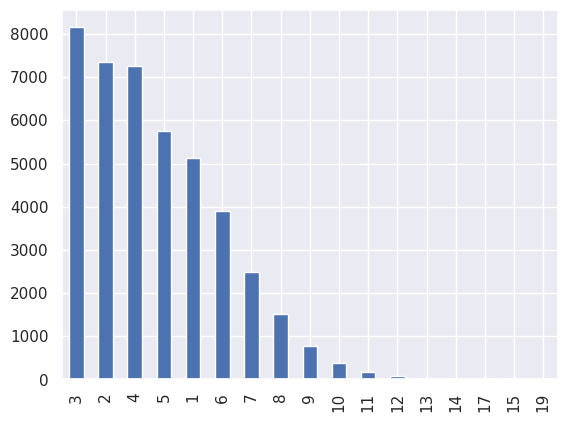

In [82]:
df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().plot(kind='bar');

In [83]:
# ---- Escolhendo threshold para a criação das arestas a depender da distribuição ----

list_num_tags = df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().index
lista_num_jogos = df_relation['Tags_em_Comum'][df_relation['Tags_em_Comum'] != 0].value_counts().values

def media_ponderada(lista_pesos , lista_valor):
    
    nominador = 0
    denominador = sum(lista_pesos)
    
    for num_tags , num_jogos in zip(list_num_tags , lista_num_jogos):
        nominador += num_tags*num_jogos
        
    return nominador/denominador
        
threshold_proximidade = media_ponderada(lista_num_jogos , list_num_tags)

print(f"\n> Threshold num_tags para arestas :  {round(threshold_proximidade)}\n")


> Threshold num_tags para arestas :  4



In [84]:
# ---- Criando arestas ----

for _ , relacao in df_relation.iterrows():
    
    if(relacao['Tags_em_Comum'] > threshold_proximidade):
        g.add_edge(relacao['node_1'], relacao['node_2'])

### Métricas da Rede

-------

In [85]:
# ---- Número de arestas, nós e densidade ----

n = g.num_vertices()
m = g.num_edges()

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
d = m / max_edges

print('\n > Número de vértices de g:', n )
print('\n > Número de arestas de g:', m)
print('\n > Densidade:', d)


 > Número de vértices de g: 299

 > Número de arestas de g: 22331

 > Densidade: 0.5012457632825301


### Calculando Degree

-------

In [86]:
# Propriedade dos vértices
data = gt_data(g)

# Calculando degrees
in_degrees = []
out_degrees = []
degrees = []

for v in g.all_vertices():
    in_degrees.append(v.in_degree())
for v in g.all_vertices():
    out_degrees.append(v.out_degree())
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data['degree'].describe()

count    299.000000
mean     149.371237
std       53.975628
min        2.000000
25%      108.000000
50%      159.000000
75%      193.500000
max      252.000000
Name: degree, dtype: float64

<AxesSubplot: xlabel='degree', ylabel='Count'>

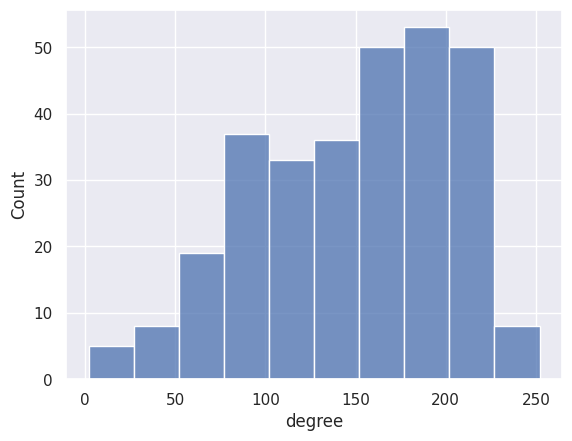

In [87]:
sns.histplot(data['degree'])

### Grafo

-------

In [92]:
# ----- Salva e renderiza grafo -----
gt_save(g, 'projeto.net.gz')

r = netpixi.render('/projeto.net.gz')

In [93]:
# ----- Algoritmo Reingold Fruchterm -----
m = gt_draw.fruchterman_reingold_layout(g)
gt_move(g, m)
gt_save(g, 'projeto_frunch.net.gz')
r = netpixi.render('projeto_frunch.net.gz');

In [ ]:
lista_int_coreness = []
lista_float_coreness = []

# Adiciona propriedades ao nó
g.add_vp('core')
g.add_vp('coreness')

# ---- Funções ----

def surprise():
    matrix = spectral.adjacency(g)
    algorithm = cpnet.Surprise()
    algorithm.detect(matrix)
    return algorithm.get_coreness()

def rombach():
    matrix = spectral.adjacency(g)
    algorithm = cpnet.Rombach()
    algorithm.detect(matrix)
    return algorithm.get_coreness()

# ---- Roda Algorítimo ----
c_core = surprise()
c_coreness = rombach()


for i, coreness in c_core.items():
    v = g.get_vertex_by_index(i)
    v['core'] = int(coreness)
    lista_int_coreness.append(int(coreness))
df_nodes['core'] = lista_int_coreness

for i, coreness in c_coreness.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)
    lista_float_coreness.append(float(coreness))
df_nodes['coreness'] = lista_float_coreness


# ---- Modifica cor ----
for v in g.all_vertices():
    if v['core'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)
        
# ---- Modifica tamanho ----

for v in g.all_vertices():
    r.vertex(v['id'], size=(10 + 40 * v['coreness']))
    r.vertex(v['MetacriticScore'], color=0xff0000)    

### Regressão Linear

-------

In [ ]:
# Nodes
df_nodes.head(2)

In [90]:
sns.scatterplot(x=df_nodes['coreness'], y=df_nodes['MetacriticScore']);

KeyError: 'coreness'

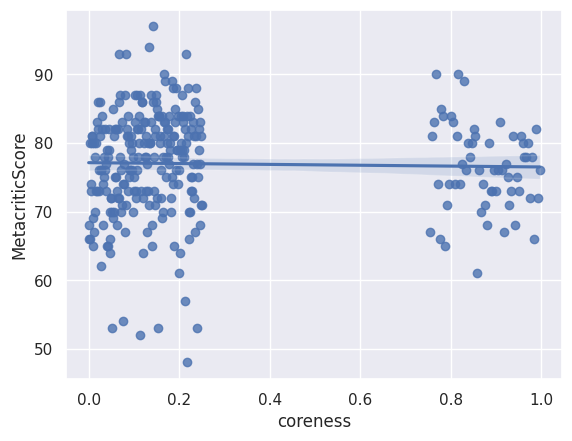

In [60]:
sns.regplot(x=df_nodes['coreness'], y=df_nodes['MetacriticScore']);

In [61]:
result = reg.linear(data=df_nodes, formula="MetacriticScore ~ coreness + ReleaseYear + TotalRevenue")

PatsyError: Error evaluating factor: NameError: name 'TotalRevenue' is not defined
    MetacriticScore ~ coreness + ReleaseYear + TotalRevenue
                                               ^^^^^^^^^^^^

In [ ]:
result.summary()

In [ ]:
result.micro_summary()

In [ ]:
result.plot_residuals()

In [ ]:
# Observa-se um treshold de divisão no coreness, dessa forma, podemos dividir esses dados em dois conjuntos
# E assim aplicar uma regressão em cada metade.

threshold_coreness = 0.5

df_nodes_menor = df_nodes[df_nodes['coreness'] < threshold_coreness]
df_nodes_maior =  df_nodes[df_nodes['coreness'] > threshold_coreness]

In [ ]:
df_nodes_menor.head()

In [ ]:
df_nodes_maior.head()

In [ ]:
# ------- Para a primeira metade  -------

sns.regplot(x=df_nodes_menor['coreness'], y=df_nodes_menor['MetacriticScore']);

In [ ]:
result_menor = reg.linear(data=df_nodes_menor, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')

In [ ]:
result_menor.micro_summary()

In [ ]:
result_menor.plot_residuals()

In [ ]:
# ------- Para a segunda metade  -------

sns.regplot(x=df_nodes_maior['coreness'], y=df_nodes_maior['MetacriticScore']);

In [ ]:
result_maior = reg.linear(data=df_nodes_maior, formula='MetacriticScore ~ coreness + ReleaseYear + TotalRevenue')

In [ ]:
result_maior.micro_summary()

In [ ]:
result_menor.plot_residuals()